<a href="https://githubtocolab.com/emiletimothy/Caltech-CS155-2023/blob/main/set2/set2_prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Loading the text files in.

In [20]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/wine_training1.txt', 'wine_training1.txt')
urllib.request.urlretrieve('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/wine_training2.txt', 'wine_training2.txt')
urllib.request.urlretrieve('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/wine_validation.txt', 'wine_validation.txt')

('wine_validation.txt', <http.client.HTTPMessage at 0x1f057a25640>)

The following function may be useful for loading the necessary data.

In [27]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [53]:
def loss(X, Y, w):
    '''
    Calculate the l2 log loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    # return -1 * np.log(1 / 1 + np.exp(- 1 * Y * np.dot(X, w)))
    return -1 * np.average(np.log(1 / (1 + np.exp(- 1 * Y * np.dot(X, w)))))


def gradient(x, y, w, lam , N):
    '''
    Calculate the gradient of the logistic error loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    return -1 * y * x / (1 + np.exp(y * np.dot(w, x))) + (2 * lam / N) * w

def SGD(X, Y, w_start, eta, N_epochs, lam):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    N = np.size(X, 0) # size of data

    # initialize weight vector
    w = w_start

    for iter in range(N_epochs):
        # iterate through each point
        for i in np.random.permutation(N):
            w -= eta * gradient(X[i], Y[i], w, lam, N)
    
    return w

In [54]:
'''
Load data sets 1 and 2. Data is normalized using
(value - mean) / standard deviation, as given in 
problem statement
'''

# TRAINING DATA SETS
data_1 = load_data('data/wine_training1.txt')
X1 = data_1[:, 1:]
Y1 = data_1[:, 0]

# Normalize the input data X
X1_mean = np.mean(X1, axis=0)
X1_st_dev = np.std(X1, axis=0)
X1 = (X1 - X1_mean) / X1_st_dev

# print(X1[0]) # matches intended on piazza :)

# Data set 2
data_2 = load_data('data/wine_training2.txt')
X2 = data_2[:, 1:]
Y2 = data_2[:, 0]

# Normalize the input data X
X2_mean = np.mean(X2, axis=0)
X2_st_dev = np.std(X2, axis=0)
X2 = (X2 - X2_mean) / X2_st_dev

# Need to add bias term
X1 = np.insert(X1, 0, 1, axis=1)
X2 = np.insert(X2, 0, 1, axis=1)

# TEST DATA SET
test_data = load_data('data/wine_validation.txt')
X_test = test_data[:, 1:]
Y_test = test_data[:, 0]

# Normalize test data 
X1_test = (X_test - X1_mean) / X1_st_dev
X2_test = (X_test - X2_mean) / X2_st_dev
X1_test = np.insert(X1_test, 0, 1, axis=1)
X2_test = np.insert(X2_test, 0, 1, axis=1)

In [123]:
N_epochs = 2000
eta = 5e-4

lambdas = [1e-5 * 5 ** i for i in range(15)]

# initialize weights to samll random numbers
w_1 = [SGD(X1, Y1, np.random.random(np.size(X1, 1)), eta, N_epochs, lam) for lam in lambdas]
w_2 = [SGD(X2, Y2, np.random.random(np.size(X1, 1)), eta, N_epochs, lam) for lam in lambdas]

w1_training_err = [loss(X1, Y1, weight) for weight in w_1]
w2_training_err = [loss(X2, Y2, weight) for weight in w_2]

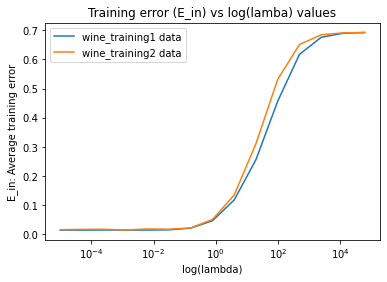

In [124]:
plt.figure()
plt.plot(lambdas, w1_training_err)
plt.plot(lambdas, w2_training_err)
plt.title('Training error (E_in) vs log(lamba) values')
plt.xlabel('log(lambda)')
plt.ylabel('E_in: Average training error')
plt.xscale('log') # told to used log-scale on horizontal axis
plt.legend(['wine_training1 data', 'wine_training2 data'], loc = 'best')
plt.show()

0.30788458201478075


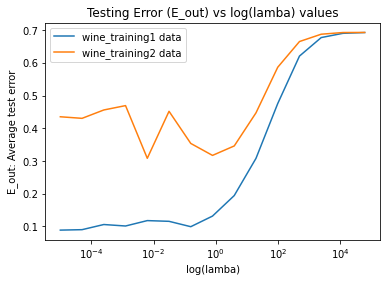

In [125]:
# Cii - Plot the average test error (Eout) versus different λs using wine validation.txt as the test set
# calculate test errors
w1_test_err = [loss(X1_test, Y_test, weight) for weight in w_1]
w2_test_err = [loss(X2_test, Y_test, weight) for weight in w_2]

# Code for Problem G
lowest_w2_test_index = 0
for i in range(len(w1_test_err)):
    if w2_test_err[i] < w2_test_err[lowest_w2_test_index]:
        lowest_w2_test_index = i 
print(w2_test_err[lowest_w2_test_index])

plt.figure()
plt.plot(lambdas, w1_test_err)
plt.plot(lambdas, w2_test_err)

plt.xscale("log") # told to used log-scale on horizontal axis
plt.xlabel("log(lamba)")
plt.ylabel("E_out: Average test error")
plt.title("Testing Error (E_out) vs log(lamba) values")
plt.legend(["wine_training1 data", "wine_training2 data"])
plt.show()

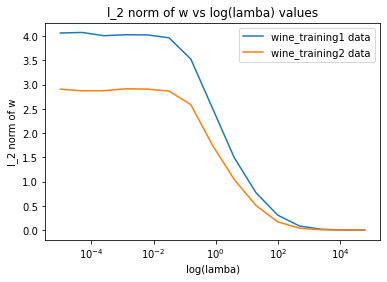

In [126]:
# Ciii - Plot the l_2 norm of w versus different λs
# calculate norms
norms1 = [np.linalg.norm(weight) for weight in w_1]
norms2 = [np.linalg.norm(weight) for weight in w_2]

plt.figure()
plt.plot(lambdas, norms1)
plt.plot(lambdas, norms2)

plt.xscale("log") # told to used log-scale on horizontal axis
plt.xlabel("log(lamba)")
plt.ylabel("l_2 norm of w")
plt.title("l_2 norm of w vs log(lamba) values")
plt.legend(["wine_training1 data", "wine_training2 data"])
plt.show()